In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler


In [38]:
df0 = pd.read_csv("../Data/sp500sub.csv",
                 index_col = 'Date',
                 parse_dates = True)

df = df0[df0['Name'] == 'SBUX'][['Close']].copy()

df['LogClose'] = np.log(df['Close'])

df['DiffLogClose'] = df['LogClose'].diff()


# Split train and test
Ntest = 21
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

# Standardize data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[['DiffLogClose']])
test_scaled = scaler.transform(test[['DiffLogClose']])

train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]


df.loc[train_idx, 'ScaledLogReturn'] = train_scaled.flatten()
df.loc[test_idx, 'ScaledLogReturn'] = test_scaled.flatten()


series = df['ScaledLogReturn'].dropna().to_numpy()

# Create AR like data
T = 10
X = []
Y = []

for t in range(len(series) - T):
    x = series[t: t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
# Reshape Data
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
print(X.shape,Y.shape)
N = len(X)

(2252, 10) (2252,)


# 1-step forecast

In [12]:
# Split train and test
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

# Basic ANN
i = Input(shape = (T,))
x = Dense(32, activation ='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

model.compile(
    loss = 'mse',
    optimizer = 'adam',
    metrics = 'mae',
)

r = model.fit(
    Xtrain,
    Ytrain,
    epochs = 200,
    validation_data = (Xtest, Ytest)
)

Epoch 1/200
70/70 [==============================] - 1s 7ms/step - loss: 1.2451 - mae: 0.7932 - val_loss: 1.1440 - val_mae: 0.8356
Epoch 2/200
70/70 [==============================] - 0s 5ms/step - loss: 1.0893 - mae: 0.7319 - val_loss: 1.1085 - val_mae: 0.8309
Epoch 3/200
70/70 [==============================] - 0s 5ms/step - loss: 1.0502 - mae: 0.7178 - val_loss: 1.1155 - val_mae: 0.8343
Epoch 4/200
70/70 [==============================] - 0s 5ms/step - loss: 1.0322 - mae: 0.7111 - val_loss: 1.1017 - val_mae: 0.8282
Epoch 5/200
70/70 [==============================] - 0s 5ms/step - loss: 1.0147 - mae: 0.7053 - val_loss: 1.0994 - val_mae: 0.8215
Epoch 6/200
70/70 [==============================] - 0s 6ms/step - loss: 1.0017 - mae: 0.7012 - val_loss: 1.0787 - val_mae: 0.8096
Epoch 7/200
70/70 [==============================] - 0s 5ms/step - loss: 0.9937 - mae: 0.6991 - val_loss: 1.0767 - val_mae: 0.8050
Epoch 8/200
70/70 [==============================] - 0s 6ms/step - loss: 0.9832 - m

70/70 [==============================] - 0s 5ms/step - loss: 0.8844 - mae: 0.6674 - val_loss: 1.0226 - val_mae: 0.7740
Epoch 64/200
70/70 [==============================] - 0s 5ms/step - loss: 0.8817 - mae: 0.6671 - val_loss: 1.0153 - val_mae: 0.7745
Epoch 65/200
70/70 [==============================] - 0s 5ms/step - loss: 0.8805 - mae: 0.6676 - val_loss: 1.0552 - val_mae: 0.7822
Epoch 66/200
70/70 [==============================] - 0s 5ms/step - loss: 0.8804 - mae: 0.6665 - val_loss: 1.0260 - val_mae: 0.7717
Epoch 67/200
70/70 [==============================] - 0s 5ms/step - loss: 0.8792 - mae: 0.6673 - val_loss: 1.0320 - val_mae: 0.7778
Epoch 68/200
70/70 [==============================] - 0s 5ms/step - loss: 0.8797 - mae: 0.6672 - val_loss: 1.0638 - val_mae: 0.7835
Epoch 69/200
70/70 [==============================] - 0s 5ms/step - loss: 0.8778 - mae: 0.6652 - val_loss: 1.0635 - val_mae: 0.7814
Epoch 70/200
70/70 [==============================] - 0s 5ms/step - loss: 0.8757 - mae: 0

Epoch 125/200
70/70 [==============================] - 0s 5ms/step - loss: 0.8289 - mae: 0.6503 - val_loss: 1.0308 - val_mae: 0.7805
Epoch 126/200
70/70 [==============================] - 0s 5ms/step - loss: 0.8281 - mae: 0.6488 - val_loss: 1.0029 - val_mae: 0.7762
Epoch 127/200
70/70 [==============================] - 0s 5ms/step - loss: 0.8303 - mae: 0.6514 - val_loss: 1.0412 - val_mae: 0.7884
Epoch 128/200
70/70 [==============================] - 0s 5ms/step - loss: 0.8266 - mae: 0.6485 - val_loss: 1.0173 - val_mae: 0.7841
Epoch 129/200
70/70 [==============================] - 0s 5ms/step - loss: 0.8290 - mae: 0.6504 - val_loss: 1.0015 - val_mae: 0.7827
Epoch 130/200
70/70 [==============================] - 0s 5ms/step - loss: 0.8247 - mae: 0.6480 - val_loss: 0.9989 - val_mae: 0.7801
Epoch 131/200
70/70 [==============================] - 0s 5ms/step - loss: 0.8240 - mae: 0.6478 - val_loss: 1.0360 - val_mae: 0.7905
Epoch 132/200
70/70 [==============================] - 0s 5ms/step - 

70/70 [==============================] - 0s 5ms/step - loss: 0.7990 - mae: 0.6410 - val_loss: 1.0087 - val_mae: 0.8074
Epoch 187/200
70/70 [==============================] - 0s 5ms/step - loss: 0.7943 - mae: 0.6394 - val_loss: 1.0483 - val_mae: 0.8238
Epoch 188/200
70/70 [==============================] - 0s 5ms/step - loss: 0.7968 - mae: 0.6429 - val_loss: 1.0283 - val_mae: 0.8299
Epoch 189/200
70/70 [==============================] - 0s 5ms/step - loss: 0.7984 - mae: 0.6393 - val_loss: 1.0336 - val_mae: 0.8175
Epoch 190/200
70/70 [==============================] - 0s 6ms/step - loss: 0.7957 - mae: 0.6401 - val_loss: 1.0312 - val_mae: 0.8207
Epoch 191/200
70/70 [==============================] - 0s 6ms/step - loss: 0.7964 - mae: 0.6410 - val_loss: 1.0650 - val_mae: 0.8198
Epoch 192/200
70/70 [==============================] - 0s 6ms/step - loss: 0.7966 - mae: 0.6404 - val_loss: 1.0289 - val_mae: 0.8067
Epoch 193/200
70/70 [==============================] - 0s 5ms/step - loss: 0.7927 -

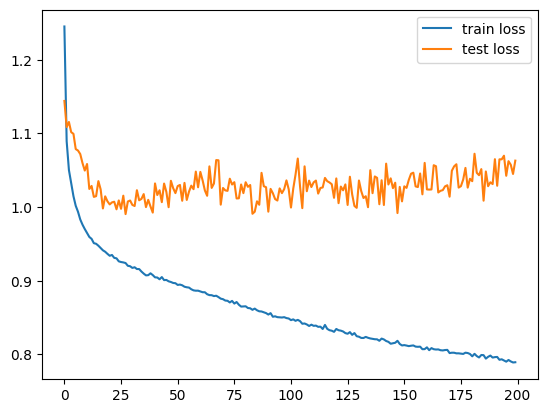

In [13]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'test loss')
plt.legend();

1/1 [==============================] - 0s 14ms/step


<Axes: xlabel='Date'>

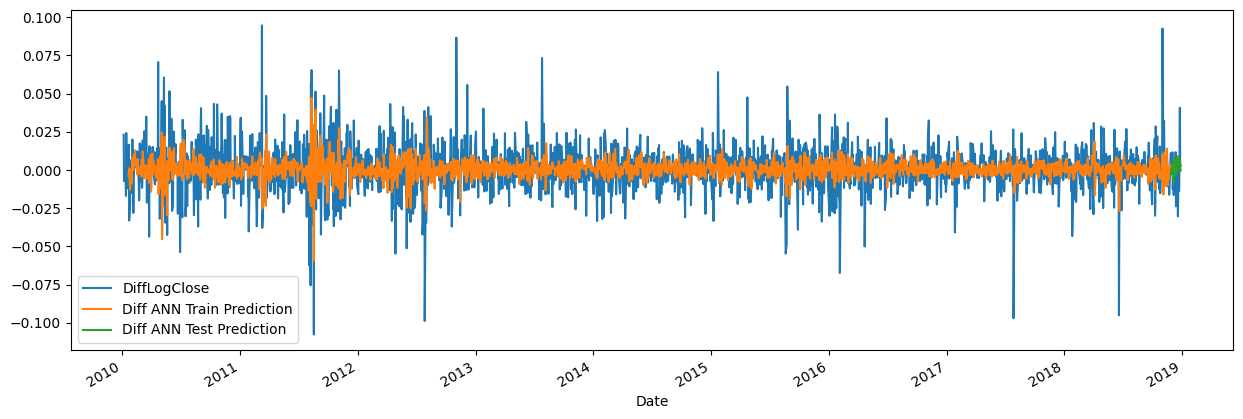

In [14]:
train_idx[:T+1] = False # Since first T are unpredictable

# These predictions are scaled, need to un-scale
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

# Unscale the predictions
Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()


# Store diff predictions
df.loc[train_idx, 'Diff ANN Train Prediction'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

# Plot the result
cols = ['DiffLogClose',
       'Diff ANN Train Prediction',
       'Diff ANN Test Prediction']
df[cols].plot(figsize = (15,5))


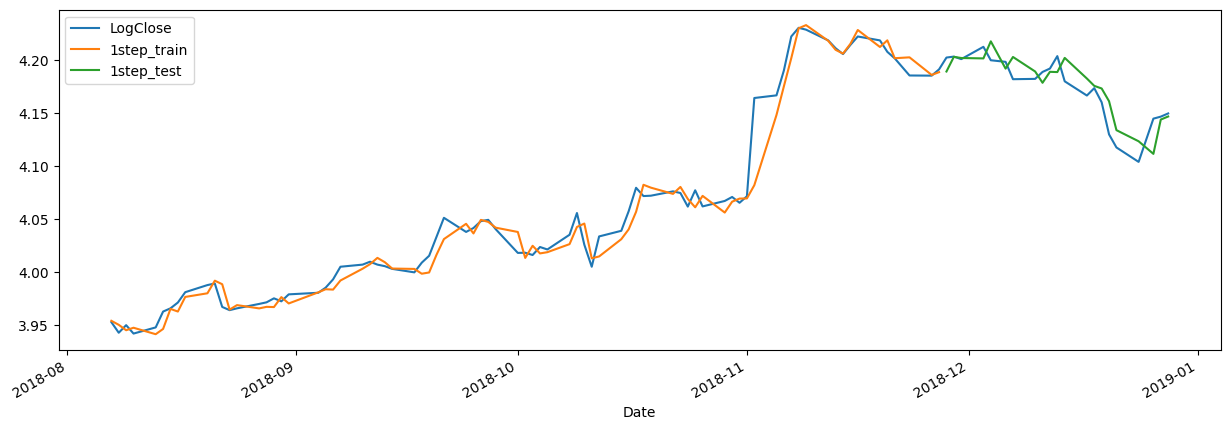

In [19]:
df['ShiftLogClose'] = df['LogClose'].shift()
prev = df['ShiftLogClose']


# Last-knownn train value
last_train = train.iloc[-1]['LogClose']

# 1-step forecast
df.loc[train_idx, "1step_train"] = prev[train_idx] + Ptrain
df.loc[test_idx, "1step_test"] = prev[test_idx] + Ptest 


# plot 1-step forecast
df.iloc[-100:][['LogClose', '1step_train', '1step_test']].plot(figsize = (15, 5));

# multi-step forecast

1/1 [==============================] - 0s 10ms/step


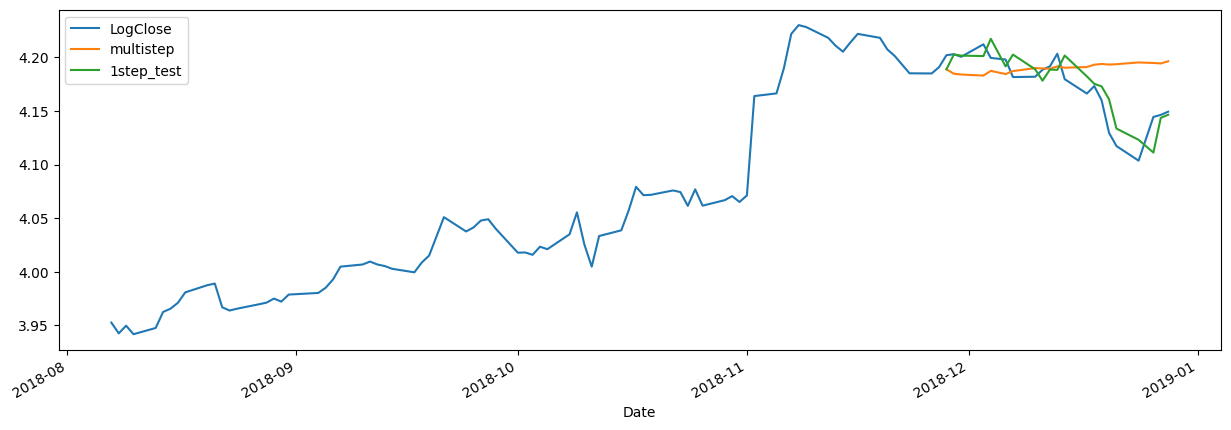

In [23]:
# Multi-step forecast
multistep_predictions = []

# first test input
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
    p = model.predict(last_x.reshape(1, -1))[0]
    
    multistep_predictions.append(p)
    
    last_x = np.roll(last_x,-1) # [1,2,3] -> [2,3,1]
    last_x[-1] = p # Replace the last value with the predicted value

# Unscale
multistep_predictions = np.array(multistep_predictions)
multistep_predictions = scaler.inverse_transform(multistep_predictions.reshape(-1, 1)).flatten()

# Save prediction
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

# plot 1-step, multistep forecast
df.iloc[-100:][['LogClose', 'multistep', '1step_test']].plot(figsize = (15, 5));

# Multi-output forecast

In [24]:
# Create AR like data
Tx = T
Ty = Ntest
X = []
Y = []

for t in range(len(series) - Tx - Ty + 1):
    x = series[t: t+Tx]
    X.append(x)
    
    y = series[t+Tx:t+Tx+Ty]
    Y.append(y)
    

# Reshape Data
X = np.array(X).reshape(-1,Tx)
Y = np.array(Y).reshape(-1,Ty)
N = len(X)
print('X.shape', X.shape, 'Y.shpae', Y.shape)

X.shape (2232, 10) Y.shpae (2232, 21)


Epoch 1/100
70/70 [==============================] - 1s 6ms/step - loss: 1.1608 - val_loss: 1.0785
Epoch 2/100
70/70 [==============================] - 0s 5ms/step - loss: 1.0724 - val_loss: 1.0527
Epoch 3/100
70/70 [==============================] - 0s 5ms/step - loss: 1.0416 - val_loss: 1.0415
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 1.0263 - val_loss: 1.0356
Epoch 5/100
70/70 [==============================] - 0s 5ms/step - loss: 1.0174 - val_loss: 1.0311
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 1.0114 - val_loss: 1.0280
Epoch 7/100
70/70 [==============================] - 0s 5ms/step - loss: 1.0072 - val_loss: 1.0255
Epoch 8/100
70/70 [==============================] - 0s 5ms/step - loss: 1.0040 - val_loss: 1.0236
Epoch 9/100
70/70 [==============================] - 0s 5ms/step - loss: 1.0013 - val_loss: 1.0232
Epoch 10/100
70/70 [==============================] - 0s 5ms/step - loss: 0.9992 - val_loss: 1.0210
Epoch 11/

70/70 [==============================] - 0s 5ms/step - loss: 0.9724 - val_loss: 1.0144
Epoch 84/100
70/70 [==============================] - 0s 5ms/step - loss: 0.9724 - val_loss: 1.0150
Epoch 85/100
70/70 [==============================] - 0s 5ms/step - loss: 0.9724 - val_loss: 1.0153
Epoch 86/100
70/70 [==============================] - 0s 5ms/step - loss: 0.9720 - val_loss: 1.0153
Epoch 87/100
70/70 [==============================] - 0s 5ms/step - loss: 0.9720 - val_loss: 1.0157
Epoch 88/100
70/70 [==============================] - 0s 6ms/step - loss: 0.9716 - val_loss: 1.0151
Epoch 89/100
70/70 [==============================] - 0s 5ms/step - loss: 0.9716 - val_loss: 1.0162
Epoch 90/100
70/70 [==============================] - 0s 5ms/step - loss: 0.9716 - val_loss: 1.0160
Epoch 91/100
70/70 [==============================] - 0s 5ms/step - loss: 0.9712 - val_loss: 1.0164
Epoch 92/100
70/70 [==============================] - 0s 5ms/step - loss: 0.9714 - val_loss: 1.0163
Epoch 93/100


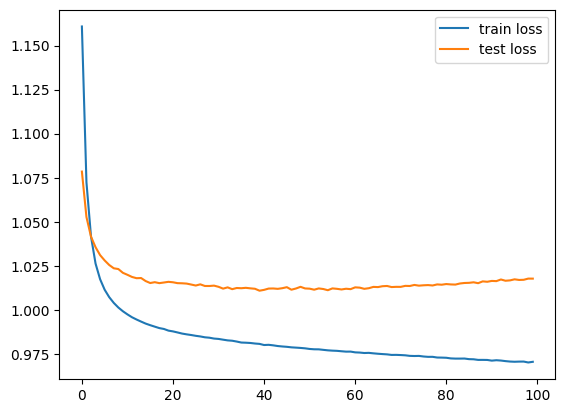

In [25]:
# Split train and test
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

# Basic ANN
i = Input(shape = (Tx,))
x = Dense(32, activation ='relu')(i)
x = Dense(Ty)(x)
model = Model(i, x)

model.compile(
    loss = 'mse',
    optimizer = 'adam',
)

r = model.fit(
    Xtrain_m,
    Ytrain_m,
    epochs = 100,
    validation_data = (Xtest, Ytest)
)

plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'test loss')
plt.legend();

1/1 [==============================] - 0s 9ms/step


<Axes: xlabel='Date'>

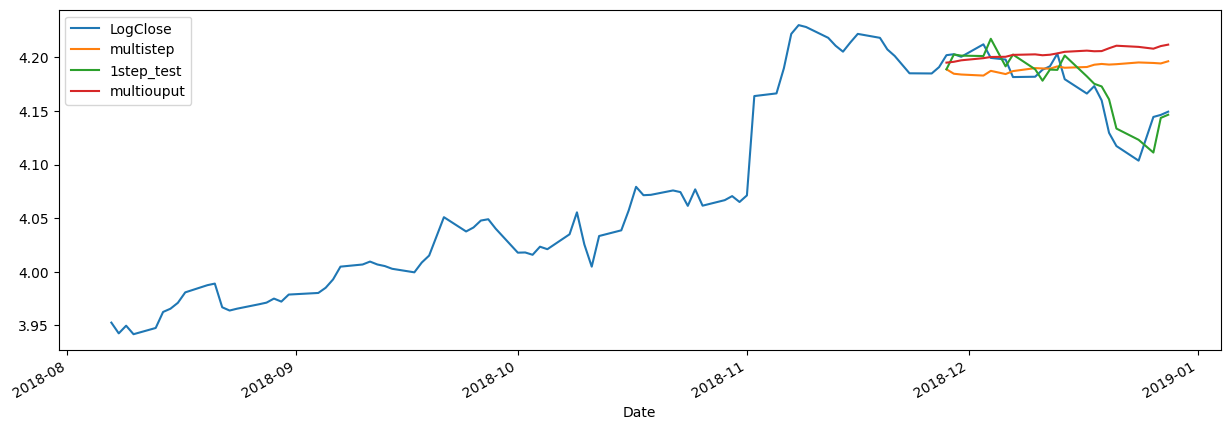

In [27]:
Ptrain = model.predict(Xtrain_m)
Ptest = model.predict(Xtest_m)

# AR like X values arel ike [y1 y2 y3] , [y2, y3, y4], so take the first col only
Ptrain = Ptrain[:,0] 
Ptest = Ptest[0]

Ptest = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()


# Store diff predictions
df.loc[test_idx, 'multiouput'] = last_train + np.cumsum(Ptest)

# Plot the result
cols = ['LogClose',
        'multistep', 
        '1step_test',
       'multiouput']
df.iloc[-100:][cols].plot(figsize = (15,5))


In [28]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogClose']
mape1 = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, 'multistep'])
print("multistep: ", mape1)

mape2 = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, 'multiouput'])
print("multioutput: ", mape2)

multistep:  0.006861903858365405
multioutput:  0.00818921641756818


# 1-step Binary Classification

In [42]:
Ytest_b.shape

(21,)

Epoch 1/100
70/70 [==============================] - 1s 9ms/step - loss: 0.7470 - accuracy: 0.5007 - val_loss: 0.7737 - val_accuracy: 0.5238
Epoch 2/100
70/70 [==============================] - 0s 7ms/step - loss: 0.7158 - accuracy: 0.4984 - val_loss: 0.7616 - val_accuracy: 0.5238
Epoch 3/100
70/70 [==============================] - 0s 6ms/step - loss: 0.7050 - accuracy: 0.5034 - val_loss: 0.7523 - val_accuracy: 0.5238
Epoch 4/100
70/70 [==============================] - 0s 7ms/step - loss: 0.6993 - accuracy: 0.5087 - val_loss: 0.7461 - val_accuracy: 0.5238
Epoch 5/100
70/70 [==============================] - 1s 7ms/step - loss: 0.6960 - accuracy: 0.5114 - val_loss: 0.7409 - val_accuracy: 0.5238
Epoch 6/100
70/70 [==============================] - 1s 7ms/step - loss: 0.6938 - accuracy: 0.5177 - val_loss: 0.7315 - val_accuracy: 0.5238
Epoch 7/100
70/70 [==============================] - 1s 7ms/step - loss: 0.6924 - accuracy: 0.5119 - val_loss: 0.7331 - val_accuracy: 0.5238
Epoch 8/100
7

Epoch 59/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6720 - accuracy: 0.5298 - val_loss: 0.6769 - val_accuracy: 0.6190
Epoch 60/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6718 - accuracy: 0.5303 - val_loss: 0.6720 - val_accuracy: 0.6190
Epoch 61/100
70/70 [==============================] - 0s 7ms/step - loss: 0.6719 - accuracy: 0.5303 - val_loss: 0.6698 - val_accuracy: 0.5714
Epoch 62/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6715 - accuracy: 0.5320 - val_loss: 0.6758 - val_accuracy: 0.5714
Epoch 63/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6715 - accuracy: 0.5285 - val_loss: 0.6719 - val_accuracy: 0.5714
Epoch 64/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6711 - accuracy: 0.5276 - val_loss: 0.6735 - val_accuracy: 0.5714
Epoch 65/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6714 - accuracy: 0.5289 - val_loss: 0.6727 - val_accuracy: 0.6190
Epoch 

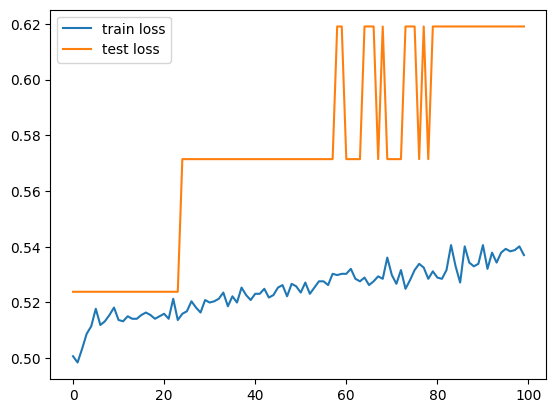

In [47]:
Ytrain_b = (Ytrain > 0) * 1
Ytest_b = (Ytest > 0) * 1

# Basic ANN
i = Input(shape = (T,))
x = Dense(16, activation ='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer = 'adam',
    metrics = ['accuracy']
)

r = model.fit(
    Xtrain,
    Ytrain_b,
    epochs = 100,
    validation_data = (Xtest, Ytest_b)
)

plt.plot(r.history['accuracy'], label = 'train loss')
plt.plot(r.history['val_accuracy'], label = 'test loss')
plt.legend();


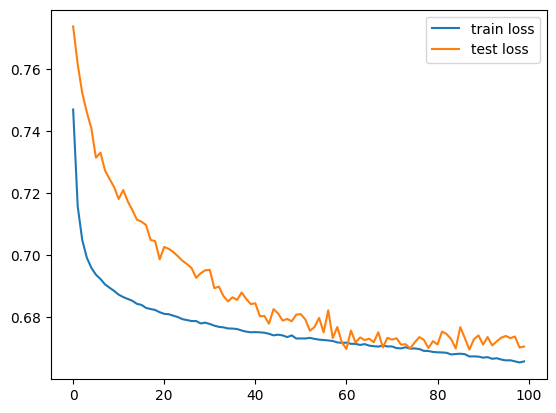

In [48]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'test loss')
plt.legend();
